In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# Standard matrix multiplication, parts 1 & 2
---


In [18]:
# rules for multiplication validity

m = 4
n = 3

# make some matrices
A = np.random.randn(m, n)
B = np.random.randn(n, m)

# build the product matrix layer-wise (for-loop)
C1 = np.zeros((m, m))
for i in range(n):
    C1 += np.outer(A[:, i], B[i, :])

# implement matrix multiplication directly
C2 = A@B
C1-C2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.55111512e-17,  0.00000000e+00,  0.00000000e+00,
         2.77555756e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.38777878e-17,
         1.38777878e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.38777878e-17]])


---
# Order-of-operations on matrices
---


In [19]:
n = 7
L = np.random.randn(n, n)
I = np.random.randn(n, n)
V = np.random.randn(n, n)
E = np.random.randn(n, n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose(L @ I @ V @ E)

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[-3.55271368e-15,  0.00000000e+00,  1.77635684e-15,
        -1.55431223e-15,  0.00000000e+00,  1.77635684e-15,
         3.55271368e-15],
       [-1.22124533e-15, -1.11022302e-16, -2.22044605e-15,
        -1.77635684e-15,  3.55271368e-15, -3.55271368e-15,
         0.00000000e+00],
       [-3.55271368e-15, -4.44089210e-16,  0.00000000e+00,
        -1.77635684e-15,  1.77635684e-15, -3.55271368e-15,
        -7.10542736e-15],
       [ 3.55271368e-15,  3.55271368e-15,  6.21724894e-15,
         2.88657986e-15, -3.55271368e-15,  5.32907052e-15,
        -3.55271368e-15],
       [-3.55271368e-15,  5.32907052e-15,  3.55271368e-15,
         3.55271368e-15,  0.00000000e+00,  1.77635684e-15,
        -3.55271368e-15],
       [ 0.00000000e+00,  7.10542736e-15,  1.06581410e-14,
         0.00000000e+00,  7.10542736e-15,  0.00000000e+00,
         1.24344979e-14],
       [ 0.00000000e+00, -7.10542736e-15,  7.10542736e-15,
         7.10542736e-15,  1.06581410e-14,  0.00000000e+00,
         4.4408921


---
#  Matrix-vector multiplication
---


In [25]:
# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m))
S = np.round( N.T*N / m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
print( S@w )     # 1
print( S.T@w )   # 2
print( w@S )     # 3
print( w.T@S.T ) # 4
print( w.T@S )   # 5
print()


# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5

[-1. -3.  0.  5.]
[-1. -3.  0.  5.]
[-1. -3.  0.  5.]
[-1. -3.  0.  5.]
[-1. -3.  0.  5.]

[ -1   0 -25  -4]
[-20  -8  -6 -23]
[-20  -8  -6 -23]
[ -1   0 -25  -4]
[-20  -8  -6 -23]



---
# 2D transformation matrices
---


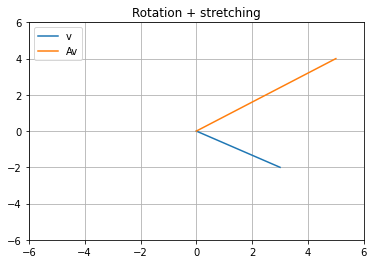

In [11]:
# 2D input vector

v = np.array([3,-2])

# 2x2 transformation matrix
A = np.array([[1,-1],[2,1]])

# output vector is Av (convert v to colums)
w = A@np.matrix.transpose(v)

#plot them

plt.plot([0,v[0]],[0,v[1]],label ='v')
plt.plot([0,w[0]],[0,w[1]],label ='Av')


plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

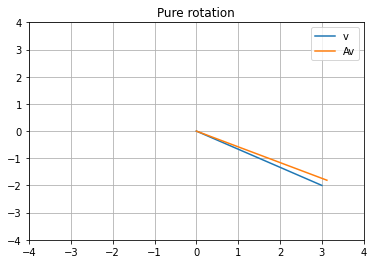

In [31]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = np.pi/50
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

The relationship between theta and magnitude of resulting vector in inpure rotation

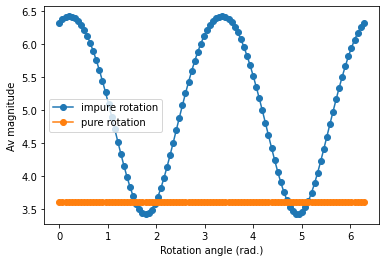

In [37]:
v = np.array([ 3, -2 ])
thetas = np.linspace(0,2*np.pi,100)

vecmags = np.zeros((len(thetas),2))
for i in range(len(thetas)):
    th = thetas[i]
    A1 = np.array([ [2*math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])
    A2 = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])
    
    #compute vectors magnitude
    vecmags[i,0] = np.linalg.norm(A1@v.T)
    vecmags[i,1] = np.linalg.norm(A2@v.T)

plt.plot(thetas,vecmags, 'o-')
plt.xlabel('Rotation angle (rad.)')
plt.ylabel('Av magnitude')
plt.legend(['impure rotation','pure rotation'])
plt.show()

(100, 2)


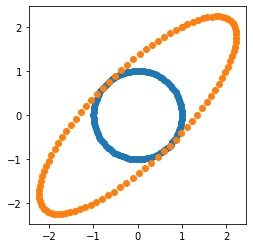

In [62]:
# generate XY coordinates for a circle

x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T
print(np.shape(xy))

# plot the circle
plt.plot(xy[:, 0], xy[:, 1], 'o')

# create 2x2 matrix
T = np.array([[-1, -2], [-2, -1]])

# multiply matrix by coords
newxy = xy@T

# plot the new cords

plt.plot(newxy[:, 0], newxy[:, 1], 'o')
plt.axis('square')
plt.show()


---
# Additive and multiplicative matrix identities
---


In [64]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   )) # true
print(np.array_equal( A   , A@I )) # True
print(np.array_equal( A   , A+I )) # False

print(np.array_equal( A   , A+I )) #Falce
print(np.array_equal( A+Z , A@I )) #True

True
True
False
False
True



---
# Additive and multiplicative symmetric matrices
---


In [70]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + A.T )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-S.T )

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [71]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )



(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
# Element-wise (Hadamard) multiplication
---


In [72]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)

[[ 0.95808781 -0.68266056]
 [ 1.16958632 -0.18224462]
 [ 0.58125872 -0.52755157]
 [ 0.04133123  1.4878336 ]
 [ 0.11072039 -0.52747451]
 [ 3.27931513  0.01954667]
 [ 2.55801395 -0.04514845]
 [-0.09506769 -1.6962589 ]
 [-1.28745378  3.29564055]
 [-3.23422687  0.01221322]
 [ 0.37122471  0.59530654]
 [ 1.28599462 -0.08933205]
 [-0.16884668 -0.60110499]]
 
[[ 0.95808781 -0.68266056]
 [ 1.16958632 -0.18224462]
 [ 0.58125872 -0.52755157]
 [ 0.04133123  1.4878336 ]
 [ 0.11072039 -0.52747451]
 [ 3.27931513  0.01954667]
 [ 2.55801395 -0.04514845]
 [-0.09506769 -1.6962589 ]
 [-1.28745378  3.29564055]
 [-3.23422687  0.01221322]
 [ 0.37122471  0.59530654]
 [ 1.28599462 -0.08933205]
 [-0.16884668 -0.60110499]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


**The question need to be explored**

What happens when we combine two sym.matrixes?

In [76]:
# Create two sym. matrices.
m=4
n=5
A = np.random.randn(m,n)
B = np.random.randn(m,n)

Asym = A@A.T
Bsym = B@B.T

# compute sum, multiplication, Hadmard mult of matrices

#Sum

Csum = Asym+Bsym
Cdot = Asym@Bsym
Chad = Asym*Bsym

# Determine whether the resulting is still symetric
print(Csum-Csum.T)
print(Cdot-Cdot.T)
print(Chad-Chad.T)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[  0.          -1.62651326   7.62249995  -0.50694241]
 [  1.62651326   0.          -2.63575705   1.88688493]
 [ -7.62249995   2.63575705   0.         -12.23761897]
 [  0.50694241  -1.88688493  12.23761897   0.        ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]



---
# Multiplication of two symmetric matrices
---


In [3]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])

# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [7]:
# nice printing in sympy
init_printing() # comes along with sympy

# but AB neq (AB)'
A@B - (A@B).T # we see it is not a sym.M

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

⎡    0       c⋅q - e⋅n   b⋅q - e⋅m⎤
⎢                                 ⎥
⎢-c⋅q + e⋅n      0       b⋅n - c⋅m⎥
⎢                                 ⎥
⎣-b⋅q + e⋅m  -b⋅n + c⋅m      0    ⎦

In [15]:
# create two sqaure matrices: 'full' and diagonal
A = np.random.randn(4,4)
D = np.diag(np.random.randn(4))

# multiply each matrix by itsel: standard and hadamard

print(A@A)
print()
print(A*A)

print(D@D)
print()
print(D*D)


[[ 0.26197642  1.82706263  0.52726762  1.79764522]
 [-1.2563605  -2.94711858  2.6939761  -1.39320948]
 [ 3.50643535  0.06353073 -1.2192463  -0.36613517]
 [-2.54752374 -2.79173604  5.01239256  2.70035564]]

[[1.61483755 1.78871009 3.42478253 0.59162931]
 [2.41059757 0.10665897 5.17557475 0.15817367]
 [0.19612932 0.27046647 0.13208439 0.96926329]
 [4.0253406  0.26793331 0.43775387 0.29989542]]
[[1.03444851e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.03478541e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.58939569e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.03977689e-02]]

[[1.03444851e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.03478541e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.58939569e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.03977689e-02]]




---
# Frobenius dot-product
---


In [26]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# method 1 - Vectorize vector, then vector dot product

Av = np.reshape(A,m*n, order = 'F') # order ='F' reshapes by columns intead of by rows
Bv = np.reshape(B,m*n, order = 'F')
#frob_dp = np.dot(Av,Bv)
frob_dp = Av@Bv

# method 2 - Trace method
frob_dp2 = np.trace(A.T@B)

print(frob_dp)
print(frob_dp2)


# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
print(Anorm)
print(Anorm2)

-3.027385673159049
-3.0273856731590496
6.780691111580255
6.780691111580255



---
# Matrix norms
---


In [33]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
#Q,R = np.linalg.qr(np.random.randn(5,5))
#print(Q)
#print(R)

# forbenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2 norm
normInd2 = np.linalg.norm(A,2)
#Note: compute as below:
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2)


16.431676725154983 16.431676725154986 16.392007827749776
